<a href="https://colab.research.google.com/github/SindhuMadi/Project1/blob/main/Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir="/content/drive/My Drive/data/" #location of input data 
low_head_dams="/content/drive/My Drive/data/train/Dams"  #location of files with low head dams samples
no_low_head_dams="/content/drive/My Drive/data/train/NoDams"  #location of files with no known low head dams samples

#checking the number of files available
print("The number of images with low-head dams : LABEL-'yes':",len(os.listdir(low_head_dams)))
print("The number of images with no known low-head dams: LABEL-'no':",len(os.listdir(no_low_head_dams)))

The number of images with low-head dams : LABEL-'yes': 130
The number of images with no known low-head dams: LABEL-'no': 396


Viewing Samples from both the classes

Low-head dam sample :


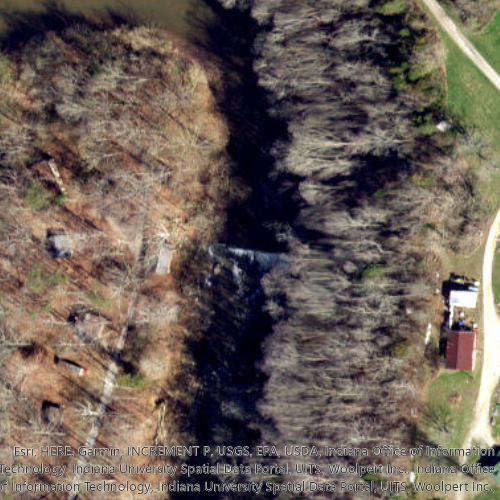

In [5]:
from IPython.display import Image
print('Low-head dam sample :')
Image('/content/drive/My Drive/data/train/Dams/10-2.png')

In [6]:
print('No known Low-head / high-head dam sample :')
Image('/content/drive/My Drive/data/train/NoDams/sample_10000.png')

No known Low-head / high-head dam sample :


2) Splitting the data into train and test sets

In [7]:
import glob
low_heads = glob.glob('/content/drive/My Drive/data/train/Dams/*.*')
no_low_heads = glob.glob('/content/drive/My Drive/data/train/NoDams/*.*')


data = []
labels = []

for i in low_heads:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    image=np.array(image)
    data.append(image)
    labels.append(1)

for i in no_low_heads:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    image=np.array(image)
    data.append(image)
    labels.append(0)


data = np.array(data)
labels = np.array(labels)

In [8]:
data.shape

(526, 500, 500, 3)

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [10]:
print("Number of images in train set: ", len(train_images))
print("Number of labels in train set: ", len(train_labels))
print("Number of images in test set: ", len(test_images))
print("Number of labels in test set: ", len(test_labels)) 

Number of images in train set:  420
Number of labels in train set:  420
Number of images in test set:  106
Number of labels in test set:  106


0


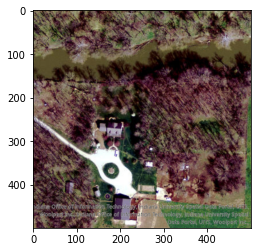

In [11]:

# Visualizing Training data
print(train_labels[162])
plt.imshow(train_images[162])

0


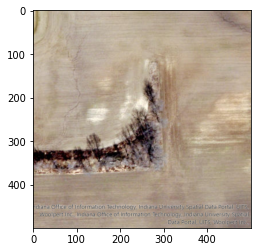

In [12]:
# Visualizing Training data
print(train_labels[15])
plt.imshow(train_images[15])

In [13]:
idx = np.where(train_labels == 1)
len(idx[0])

106

In [14]:
idx = np.where(train_labels == 0)
len(idx[0])

314

0


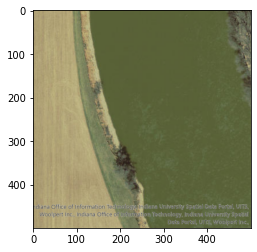

In [15]:
print(train_labels[70])
plt.imshow(train_images[70])

Sindhu's version

Using ImageData Generator, augmentation

In [16]:
train_dam_dir='/content/drive/My Drive/data/train/Dams/' #testing dir with mask images
train_nodam_dir='/content/drive/My Drive/data/train/NoDams/'  # testing dir without mask images
test_dam_dir='/content/drive/My Drive/data/test/Dams/'  #training dir with mask images
test_nodam_dir='/content/drive/My Drive/data/test/NoDams/'    #training dir without mask images


In [17]:
print("The number of images with dams in the training set labelled 'yes':", len(os.listdir(train_dam_dir)))
print("The number of images with no dams in the training set labelled 'no':", len(os.listdir(train_nodam_dir)))
print("The number of images with dams test set labelled 'yes':", len(os.listdir(test_dam_dir)))
print("The number of images with no dams test set labelled 'no':", len(os.listdir(test_nodam_dir)))

The number of images with dams in the training set labelled 'yes': 130
The number of images with no dams in the training set labelled 'no': 396
The number of images with dams test set labelled 'yes': 32
The number of images with no dams test set labelled 'no': 99


In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255,
                                             shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              vertical_flip = True, validation_split = 0.2)

In [19]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255,)

In [20]:
train_x = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                            class_mode = 'binary', 
                                            batch_size = 16,
                                            target_size = (500,500))

Found 526 images belonging to 2 classes.


In [21]:
test_x = test_datagen.flow_from_directory('/content/drive/My Drive/data/test', class_mode='binary',
                                            batch_size=16,
                                            target_size = (500,500))

Found 131 images belonging to 2 classes.


In [22]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_x.classes), 
                train_x.classes)

In [23]:
class_weights = dict(enumerate(class_weights))

In [24]:
class_weights

{0: 2.023076923076923, 1: 0.6641414141414141}

In [25]:
class_weights_test = class_weight.compute_class_weight(
               'balanced',
                np.unique(test_x.classes), 
                test_x.classes)
class_weights_test = dict(enumerate(class_weights_test))
class_weights_test

{0: 2.046875, 1: 0.6616161616161617}

In [26]:
initial_bias = np.log([130/396])
initial_bias

array([-1.11387976])

In [27]:
output_bias = tf.keras.initializers.Constant(initial_bias)

In [33]:
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(500, 500, 3), padding="same"))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(1024, (2, 2), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model3.add(Dense(32, activation=tf.nn.relu))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation=tf.nn.relu))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(128, activation=tf.nn.relu))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation=tf.nn.sigmoid))

In [34]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 500, 500, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 166, 166, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 166, 166, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 55, 55, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 128)      

In [35]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


In [37]:
model3.compile(optimizer='RMSProp', 
              loss='binary_crossentropy', 
              metrics=METRICS)

In [41]:
history = model3.fit(train_x, epochs=40, shuffle=True, class_weight= class_weights)

Epoch 1/40
33/33 [==============================] - 33s 1s/step - loss: 0.7409 - tp: 208.0000 - fp: 65.0000 - tn: 65.0000 - fn: 188.0000 - accuracy: 0.5190 - precision: 0.7619 - recall: 0.5253 - auc: 0.5046
Epoch 2/40
33/33 [==============================] - 33s 989ms/step - loss: 0.7312 - tp: 201.0000 - fp: 66.0000 - tn: 64.0000 - fn: 195.0000 - accuracy: 0.5038 - precision: 0.7528 - recall: 0.5076 - auc: 0.5214
Epoch 3/40
33/33 [==============================] - 33s 988ms/step - loss: 0.7431 - tp: 196.0000 - fp: 58.0000 - tn: 72.0000 - fn: 200.0000 - accuracy: 0.5095 - precision: 0.7717 - recall: 0.4949 - auc: 0.4868
Epoch 4/40
33/33 [==============================] - 32s 964ms/step - loss: 0.7222 - tp: 167.0000 - fp: 62.0000 - tn: 68.0000 - fn: 229.0000 - accuracy: 0.4468 - precision: 0.7293 - recall: 0.4217 - auc: 0.4937
Epoch 5/40
33/33 [==============================] - 32s 962ms/step - loss: 0.7234 - tp: 217.0000 - fp: 67.0000 - tn: 63.0000 - fn: 179.0000 - accuracy: 0.5323 - pr

In [42]:
model3.evaluate_generator(test_x)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.29427438974380493,
 87.0,
 3.0,
 29.0,
 12.0,
 0.885496199131012,
 0.9666666388511658,
 0.8787878751754761,
 0.9622790813446045]

In [43]:
scores = model3.predict_generator(test_x)

Instructions for updating:
Please use Model.predict, which supports generators.


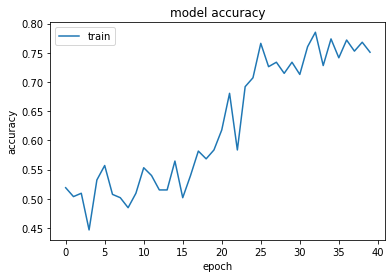

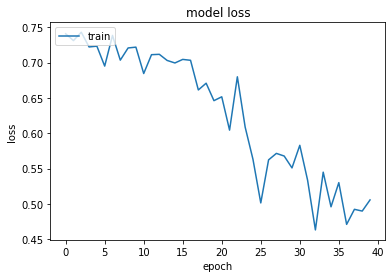

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
#predicted vs actual values
scores

array([[0.6236886 ],
       [0.3257971 ],
       [0.89957875],
       [0.46894163],
       [0.88871354],
       [0.0544238 ],
       [0.48311168],
       [0.71644557],
       [0.8941051 ],
       [0.8896888 ],
       [0.8995087 ],
       [0.39204857],
       [0.7265526 ],
       [0.89048296],
       [0.86762977],
       [0.8993179 ],
       [0.5114317 ],
       [0.8943793 ],
       [0.8941885 ],
       [0.79115105],
       [0.4734808 ],
       [0.02034696],
       [0.32130173],
       [0.28097832],
       [0.8979546 ],
       [0.8949004 ],
       [0.78709626],
       [0.10409325],
       [0.8978021 ],
       [0.840908  ],
       [0.8883841 ],
       [0.7074184 ],
       [0.8309913 ],
       [0.11824342],
       [0.23917037],
       [0.29420242],
       [0.876932  ],
       [0.03626869],
       [0.8978896 ],
       [0.8544345 ],
       [0.02538178],
       [0.891483  ],
       [0.8688727 ],
       [0.22832327],
       [0.89439887],
       [0.7698101 ],
       [0.8621889 ],
       [0.877

In [47]:
sum(test_x.classes==0)

32

In [48]:
#predicted vs Actual
correct_0 = 0
correct_1 = 0

for i in range(len(test_x.classes)):
  predicted_class = 0 if scores[i]<0.5 else 1
  print("Predicted class:", predicted_class, "Actual Class: ", test_x.classes[i])

  if(predicted_class== test_x.classes[i] == 0):
    correct_0+=1

  if(predicted_class== test_x.classes[i] == 1):
    correct_1+=1

print("Number of correct predictions for class 0:", correct_0, " out of " , sum(test_x.classes==0))
print("Number of correct predictions for class 1:", correct_1, "out of ", sum(test_x.classes==1))

Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 0 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 1 Actual Class:  0
Predicted class: 0 Actual Cl

In [49]:
class_pred = np.array([np.argmax(i) for i in scores])

In [50]:
np.where(class_pred == 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130]),)

In [51]:
# Correctly predicted image for class 0

image_index = 30


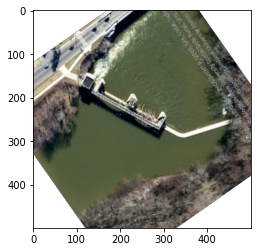

In [52]:
#Vandana - image_rotation

from PIL import Image 
img = Image.open(r"/content/drive/My Drive/data/train/Dams/2-3.png") 
rotate_img= img.rotate(125) 
plt.imshow(rotate_img)
#rotate_img.show()
